In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# DATASET 1

In [ ]:
coffee_df = pd.read_csv("synthetic_coffee_health_10000.csv")

coffee_df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [28]:
print(coffee_df.isnull().sum())
#considering none indicates no health issues
print(coffee_df.duplicated().sum())

ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physical_Activity_Hours       0
Health_Issues              5941
Occupation                    0
Smoking                       0
Alcohol_Consumption           0
dtype: int64
0


In [34]:
print(coffee_df.columns)


Index(['ID', 'Age', 'Country', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours',
       'Sleep_Quality', 'BMI', 'Heart_Rate', 'Stress_Level',
       'Physical_Activity_Hours', 'Health_Issues', 'Smoking',
       'Alcohol_Consumption', 'Gender_Female', 'Gender_Male', 'Gender_Other',
       'Occupation_Healthcare', 'Occupation_Office', 'Occupation_Other',
       'Occupation_Service', 'Occupation_Student'],
      dtype='object')


In [ ]:
#encdoing columns
# ONE HOT ENCODING
# FREQUENCY ENCODING
# LABEL ENCODING/ ORDINAL ENCODING

#label encoding
cols_label_encode = ['Sleep_Quality', 'Stress_Level', 'Health_Issues']

label_encoder = LabelEncoder()
for col in cols_label_encode:
    coffee_df[col] = label_encoder.fit_transform(coffee_df[col])

# one hot encoding
coffee_df = pd.get_dummies(coffee_df, columns=['Gender', 'Occupation'])

#frequency encoding
freq_count = coffee_df['Country'].value_counts()
coffee_df['Country'] = coffee_df['Country'].map(freq_count)



In [36]:
coffee_df.head()

,ID,Age,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,...,Smoking,Alcohol_Consumption,Gender_Female,Gender_Male,Gender_Other,Occupation_Healthcare,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
0,1,40,497,3.5,328.1,7.5,2,24.9,78,1,...,0,0,False,True,False,False,False,True,False,False
1,2,33,497,1.0,94.1,6.2,2,20.0,67,1,...,0,0,False,True,False,False,False,False,True,False
2,3,42,456,5.3,503.7,5.9,1,22.7,59,2,...,0,0,False,True,False,False,True,False,False,False
3,4,53,497,2.6,249.2,7.3,2,24.7,71,1,...,0,0,False,True,False,False,False,True,False,False
4,5,32,486,3.1,298.0,5.3,1,24.1,76,2,...,0,1,True,False,False,False,False,False,False,True


In [37]:
# classifying sleep quality of a coffee addicted person
x = coffee_df.drop('Sleep_Quality', axis=1)
y = coffee_df['Sleep_Quality']

y.head()

0    2
1    2
2    1
3    2
4    1
Name: Sleep_Quality, dtype: int64

In [38]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state=42)


# ENTROPY WITHOUT PRUNING

In [39]:
dt = DecisionTreeClassifier(criterion='entropy')
modelDT = dt.fit(x_train, y_train)


In [41]:
#predicting
y_pred = dt.predict(x_test)
print(y_pred)

[2 2 2 ... 2 1 3]


In [42]:
#training Accuracy
train_acc = dt.score(x_train, y_train)
print("Training Accuracy: ", train_acc*100)

Training Accuracy:  100.0


In [44]:
#testing accuracy(using score)
test_acc = dt.score(x_test, y_test)
print("Testing Accuracy: ", test_acc*100)

Testing Accuracy:  99.13333333333333


In [46]:
# testingaccuracy using accuracy
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc_score*100)

Accuracy:  99.13333333333333


# ENTROPY WITH PRUNING

In [47]:
dt = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.015)
modeldt = dt.fit(x_test, y_test)

In [48]:
y_pred = dt.predict(x_test)
print(y_pred)

[2 2 2 ... 2 1 3]


In [49]:
#traning accuracy
train_acc = dt.score(x_train, y_train)
print("Training Accuracy: ", train_acc*100)

#testing accuracy(using score)
test_acc = dt.score(x_test, y_test)
print("Testing Accuracy: ", test_acc*100)

# testingaccuracy using accuracy
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc_score*100)

Training Accuracy:  99.2
Testing Accuracy:  99.06666666666666
Accuracy:  99.06666666666666


# GINI WITHOUT PRUNING

In [50]:
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
modelDT = dt.fit(x_test, y_test)


In [51]:
y_pred = dt.predict(x_test)
print(y_pred)

[2 2 2 ... 2 1 3]


In [52]:
# training accuracy
train_acc = dt.score(x_train, y_train)
print("Training Accuracy: ", train_acc*100)

#testing accuracy(using score)
test_acc = dt.score(x_test, y_test)
print("Testing Accuracy: ", test_acc*100)

# testingaccuracy using accuracy
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc_score*100)

Training Accuracy:  99.04285714285714
Testing Accuracy:  100.0
Accuracy:  100.0


# GINI INDEX WITH PRUNING

In [54]:
dt = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.015, random_state=42)
modelDT = dt.fit(x_test, y_test)

In [55]:
y_pred = dt.predict(x_test)
print(y_pred)

[2 2 2 ... 2 1 3]


In [56]:
# traning accuracy
train_acc = dt.score(x_train, y_train)
print("Training Accuracy: ", train_acc*100)

#testing accuracy(using score)
test_acc = dt.score(x_test, y_test)
print("Testing Accuracy: ", test_acc*100)

# testingaccuracy using accuracy
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc_score*100)

Training Accuracy:  99.2
Testing Accuracy:  99.06666666666666
Accuracy:  99.06666666666666


# DATASET 2

In [57]:
sleep_df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
sleep_df.isnull().sum()
#sleep disorder none shows that the person does not have any kind of disorder

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [60]:
#duplicates
print(sleep_df.duplicated().sum())

0


In [61]:
sleep_df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [64]:
# In BMI category, first categorize then label encoding

#checking the unique values in BMI
print(sleep_df['BMI Category'].unique())

mapping = {
    'Normal Weight' : 'Normal',
    'Normal' : 'Normal',
    'Overweight' : 'Overweight',
    'Obese' : 'Obese'
}

sleep_df['BMI Category'] = sleep_df['BMI Category'].replace(mapping)
print("After Categorizing: ",sleep_df['BMI Category'].unique())


['Overweight' 'Normal' 'Obese' 'Normal Weight']
After Categorizing:  ['Overweight' 'Normal' 'Obese']


In [66]:
# Label Encoding
label_encoder = LabelEncoder()
sleep_df['BMI Category'] = label_encoder.fit_transform(sleep_df['BMI Category'])

In [67]:
# one hot encoding
sleep_df = pd.get_dummies(sleep_df, columns=['Gender', 'Occupation', 'Sleep Disorder'])

In [68]:
sleep_df.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea
0,1,27,6.1,6,42,6,2,126/83,77,4200,...,False,False,False,False,False,False,True,False,False,False
1,2,28,6.2,6,60,8,0,125/80,75,10000,...,False,False,False,False,False,False,False,False,False,False
2,3,28,6.2,6,60,8,0,125/80,75,10000,...,False,False,False,False,False,False,False,False,False,False
3,4,28,5.9,4,30,8,1,140/90,85,3000,...,False,False,False,True,False,False,False,False,False,True
4,5,28,5.9,4,30,8,1,140/90,85,3000,...,False,False,False,True,False,False,False,False,False,True


##### blood pressure values should be divied into 2 cols systolic and diastolic

In [69]:
sleep_df[['Systolic BP', 'Diastolic BP']] = sleep_df['Blood Pressure'].str.split('/', expand=True)

sleep_df['Systolic BP'] = pd.to_numeric(sleep_df['Systolic BP'], errors='coerce')
sleep_df['Diastolic BP'] = pd.to_numeric(sleep_df['Diastolic BP'], errors='coerce')

In [71]:
sleep_df.drop('Blood Pressure', axis=1, inplace=True)
sleep_df.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Gender_Female,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea,Systolic BP,Diastolic BP
0,1,27,6.1,6,42,6,2,77,4200,False,...,False,False,False,False,True,False,False,False,126,83
1,2,28,6.2,6,60,8,0,75,10000,False,...,False,False,False,False,False,False,False,False,125,80
2,3,28,6.2,6,60,8,0,75,10000,False,...,False,False,False,False,False,False,False,False,125,80
3,4,28,5.9,4,30,8,1,85,3000,False,...,False,True,False,False,False,False,False,True,140,90
4,5,28,5.9,4,30,8,1,85,3000,False,...,False,True,False,False,False,False,False,True,140,90


# ENTROPY WITHOUT PRUNING

In [78]:
sleep_df.columns
#x = sleep_df.drop('Sleep Disorder', axis = 1)
#y = sleep_df['Sleep Disorder']

#y.head()

Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Gender_Female', 'Gender_Male', 'Occupation_Accountant',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'Sleep Disorder_Insomnia',
       'Sleep Disorder_Sleep Apnea', 'Systolic BP', 'Diastolic BP'],
      dtype='object')

In [80]:
# converting back to single column from one hot encoding
sleep_df['Sleep Disorder'] = sleep_df[['Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea']].idxmax(axis=1)
# Remove the prefix to get clean labels
sleep_df['Sleep Disorder'] = sleep_df['Sleep Disorder'].str.replace('Sleep Disorder_', '')

sleep_df.head()

# Drop the one-hot Sleep Disorder columns
sleep_df = sleep_df.drop(['Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea'], axis=1)

# Check
print(sleep_df.columns)


Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Gender_Female', 'Gender_Male', 'Occupation_Accountant',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'Systolic BP', 'Diastolic BP', 'Sleep Disorder'],
      dtype='object')


In [82]:
x = sleep_df.drop('Sleep Disorder', axis=1)
y = sleep_df['Sleep Disorder']

y.head()

0       Insomnia
1       Insomnia
2       Insomnia
3    Sleep Apnea
4    Sleep Apnea
Name: Sleep Disorder, dtype: object

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)


# ENTROPY WITH PRUNING

In [84]:
dt = DecisionTreeClassifier(criterion='entropy')
modelDT = dt.fit(x_train, y_train)


In [85]:
y_pred = dt.predict(x_test)
print(y_pred)

['Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Sleep Apnea' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Sleep Apnea'
 'Insomnia' 'Insomnia' 'Insomnia' 'Sleep Apnea' 'Sleep Apnea' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Sleep Apnea'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Sleep Apnea' 'Insomnia' 'Sleep Apnea' 'Insomnia' 'Sleep Apnea'
 'Insomnia' 'Insomnia' 'Sleep Apnea' 'Insomnia' 'Sleep Apnea'
 'Sleep Apnea' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Sleep Apnea' 'Sleep Apnea' 'Insomnia'
 'Insomnia' 'Insomnia' 'Sleep Apnea' 'Insomnia' 'Insomnia' 'Sleep Apnea'
 'Insomnia' 'Insomnia' 'Insomnia' 'Slee

In [87]:
# training Accuracy
train_acc = dt.score(x_train, y_train)
print("Training Accuracy: ", train_acc*100)

#testing accuracy(using score)
test_acc = dt.score(x_test, y_test)
print("Testing Accuracy: ", test_acc*100)

# testingaccuracy using accuracy
acc_score = accuracy_score(y_test, y_pred)

Training Accuracy:  100.0
Testing Accuracy:  92.03539823008849


# ENTROPY WITH PRUNING

In [97]:
dt = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.015)
modeldt = dt.fit(x_test, y_test)

In [98]:
y_pred = dt.predict(x_test)
print(y_pred)

['Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Sleep Apnea'
 'Insomnia' 'Insomnia' 'Insomnia' 'Sleep Apnea' 'Sleep Apnea' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Sleep Apnea'
 'Sleep Apnea' 'Sleep Apnea' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Sleep Apnea' 'Sleep Apnea' 'Sleep Apnea'
 'Sleep Apnea' 'Insomnia' 'Sleep Apnea' 'Sleep Apnea' 'Sleep Apnea'
 'Sleep Apnea' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Sleep Apnea' 'Sleep Apnea' 'Insomnia'
 'Insomnia' 'Insomnia' 'Sleep Apnea' 'Sleep Apnea' 'Insomnia'
 'Sleep Apnea' 'Insomnia' 'Insomnia' 'Ins

In [99]:
# traning accuracy
train_acc = dt.score(x_train, y_train)
print("Training Accuracy: ", train_acc*100)

#testing accuracy(using score)
test_acc = dt.score(x_test, y_test)
print("Testing Accuracy: ", test_acc*100)

# testingaccuracy using accuracy
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc_score*100)

Training Accuracy:  90.42145593869732
Testing Accuracy:  100.0
Accuracy:  100.0


## combining actual vs predicted and analyzing their count

In [100]:
results = pd.DataFrame(
    {
        'Actual': y_test,
        'Predicted': y_pred
    }
)

print(results.head())

       Actual Predicted
329  Insomnia  Insomnia
33   Insomnia  Insomnia
15   Insomnia  Insomnia
325  Insomnia  Insomnia
57   Insomnia  Insomnia


In [101]:
# analyzing counts
correct = (y_test == y_pred).sum()
print("Number of correct predictions: ", correct)

wrong = (y_test != y_pred).sum()
print("Number of wrong predictions: ", wrong)

Number of correct predictions:  113
Number of wrong predictions:  0


In [102]:
# how much out of total were correct?

total = len(y_test)
print(f"{correct} out of {total} were correctly predicted.")

113 out of 113 were correctly predicted.


# GINI WITHOUT PRUNING

In [91]:
dt = DecisionTreeClassifier(criterion='gini')
modelDT = dt.fit(x_test, y_test)

In [92]:
y_pred = dt.predict(x_test)
print(y_pred)

['Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Sleep Apnea'
 'Insomnia' 'Insomnia' 'Insomnia' 'Sleep Apnea' 'Sleep Apnea' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Sleep Apnea'
 'Sleep Apnea' 'Sleep Apnea' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Sleep Apnea' 'Sleep Apnea' 'Sleep Apnea'
 'Sleep Apnea' 'Insomnia' 'Sleep Apnea' 'Sleep Apnea' 'Sleep Apnea'
 'Sleep Apnea' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Sleep Apnea' 'Sleep Apnea' 'Insomnia'
 'Insomnia' 'Insomnia' 'Sleep Apnea' 'Sleep Apnea' 'Insomnia'
 'Sleep Apnea' 'Insomnia' 'Insomnia' 'Ins

In [93]:
#training accuracy
train_acc = dt.score(x_train, y_train)
print("Training Accuracy: ", train_acc*100)

#testing accuracy(using score)
test_acc = dt.score(x_test, y_test)
print("Testing Accuracy: ", test_acc*100)

# testingaccuracy using accuracy
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc_score*100)

Training Accuracy:  89.272030651341
Testing Accuracy:  100.0
Accuracy:  100.0


# GINI WITH PRUNING

In [94]:
dt = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.015)
modelDT = dt.fit(x_test, y_test)

In [95]:
y_pred = dt.predict(x_test)
print(y_pred)

['Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Sleep Apnea' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Sleep Apnea'
 'Insomnia' 'Insomnia' 'Insomnia' 'Sleep Apnea' 'Sleep Apnea' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Sleep Apnea'
 'Sleep Apnea' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Sleep Apnea' 'Insomnia' 'Sleep Apnea' 'Sleep Apnea' 'Sleep Apnea'
 'Insomnia' 'Insomnia' 'Sleep Apnea' 'Sleep Apnea' 'Sleep Apnea'
 'Sleep Apnea' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Sleep Apnea' 'Sleep Apnea' 'Insomnia'
 'Insomnia' 'Insomnia' 'Sleep Apnea' 'Sleep Apnea' 'Insomnia'
 'Sleep Apnea' 'Insomnia' 'Insomnia' 'Ins

In [96]:
# traning accuracy
train_acc = dt.score(x_train, y_train)
print("Training Accuracy: ", train_acc*100)

#testing accuracy(using score)
test_acc = dt.score(x_test, y_test)
print("Testing Accuracy: ", test_acc*100)

# testingaccuracy using accuracy
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc_score*100)

Training Accuracy:  92.33716475095785
Testing Accuracy:  95.57522123893806
Accuracy:  95.57522123893806


# GRAPH


In [105]:
train_acc_data1 = [99.2, 100,99.4, 99.2]
test_acc_data1 = [99.6, 99.13, 100, 99.06]

train_acc_data2 = [100, 90,89,92.337]
test_acc_data2 = [92,100,100,95.57]


methods = ['DT_Entropy', 'DT_Entropy_PRUNED', 'DT_Gini', 'DT_Gini_PRUNED']

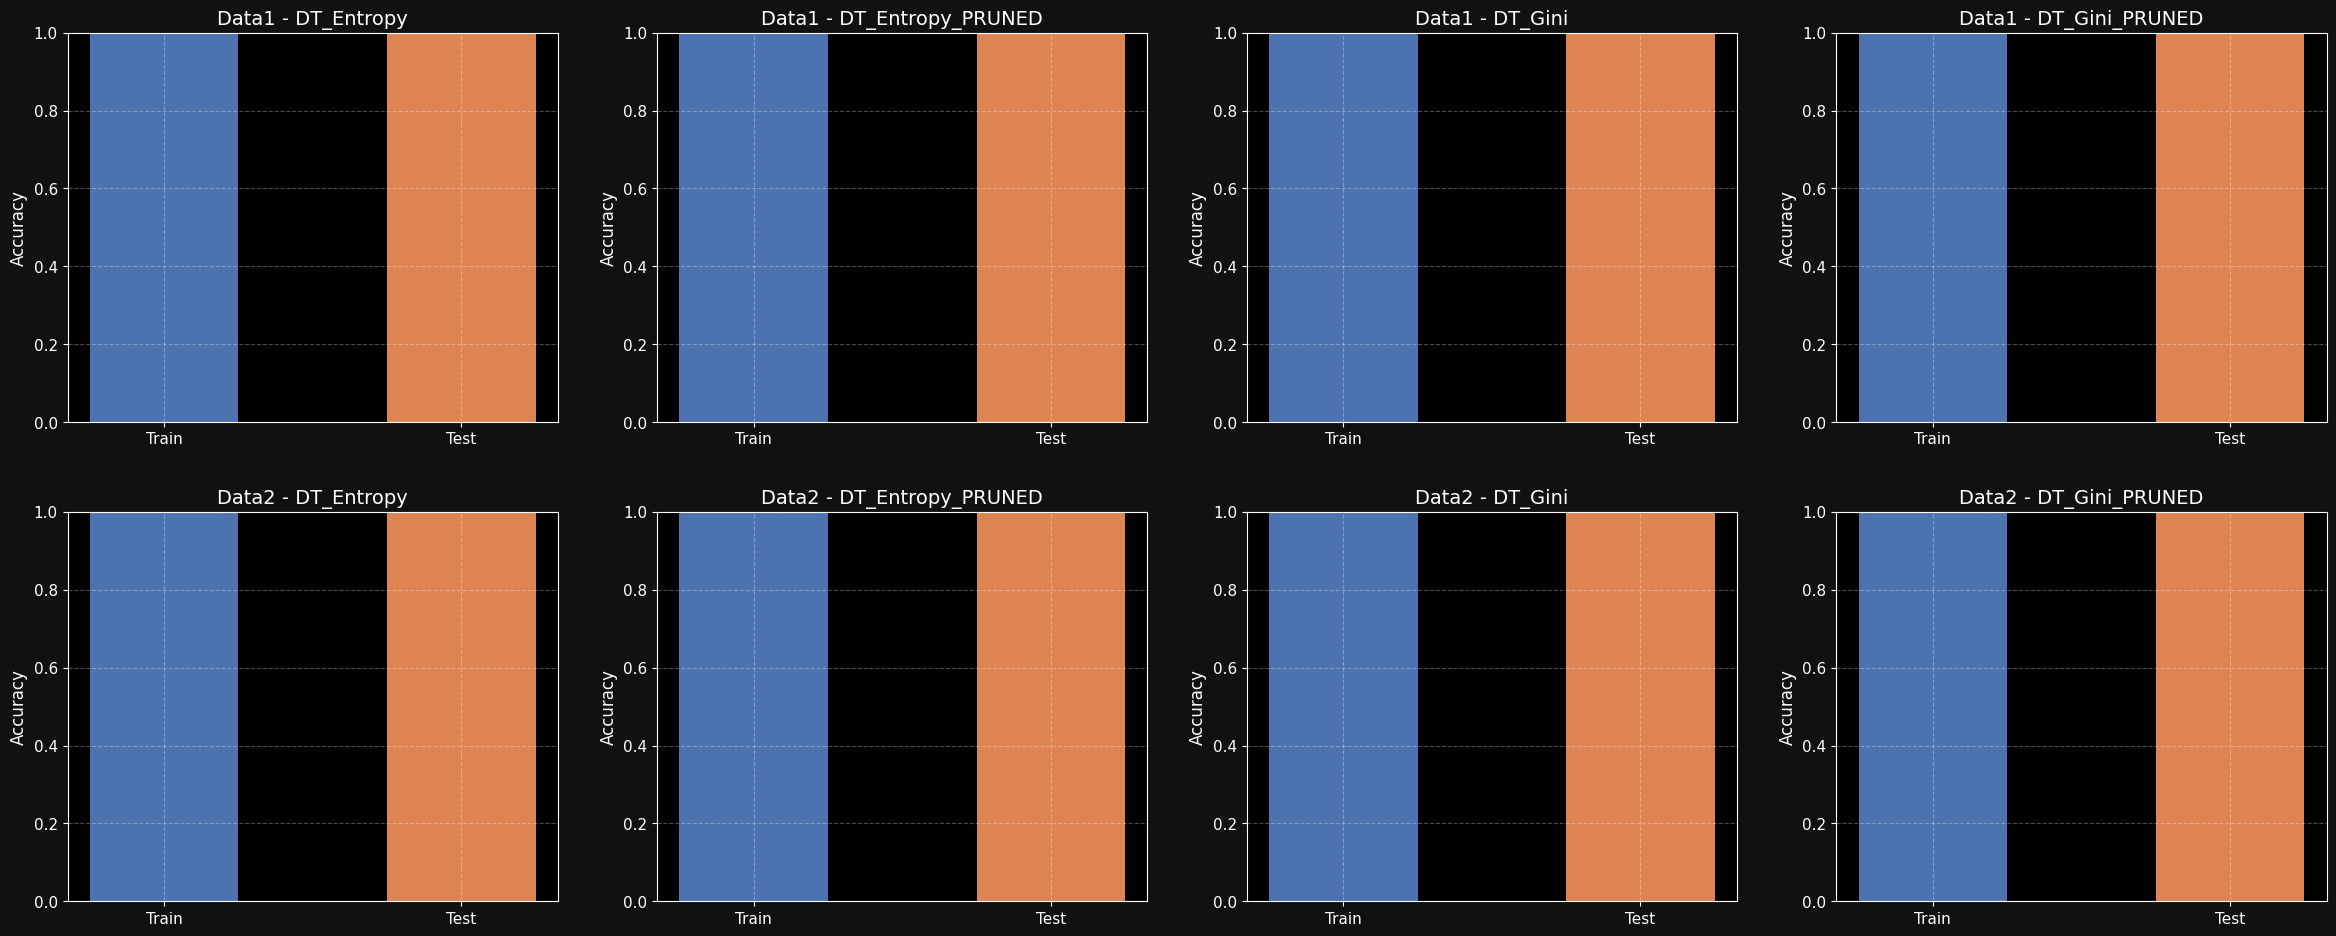

In [ ]:
# Dark background style
plt.style.use('dark_background')

# Create subplots (2 rows × 4 columns)
fig, axs = plt.subplots(2, 4, figsize=(24,10), facecolor='#111111')

# Colors for Train and Test
colors = ['#4C72B0', '#DD8452']  

# Bar width
bar_width = 0.5

# Plot Data1
for i, method in enumerate(methods):
    axs[0, i].bar(['Train','Test'], [train_acc_data1[i], test_acc_data1[i]], 
                  color=colors, width=bar_width)
    axs[0, i].set_ylim(0,1)
    axs[0, i].set_title(f'Data1 - {method}', color='white', fontsize=14)
    axs[0, i].set_ylabel('Accuracy', color='white', fontsize=12)
    axs[0, i].tick_params(axis='x', colors='white', labelsize=11)
    axs[0, i].tick_params(axis='y', colors='white', labelsize=11)
    axs[0, i].grid(True, linestyle='--', alpha=0.3)

# Plot Data2
for i, method in enumerate(methods):
    axs[1, i].bar(['Train','Test'], [train_acc_data2[i], test_acc_data2[i]], 
                  color=colors, width=bar_width)
    axs[1, i].set_ylim(0,1)
    axs[1, i].set_title(f'Data2 - {method}', color='white', fontsize=14)
    axs[1, i].set_ylabel('Accuracy', color='white', fontsize=12)
    axs[1, i].tick_params(axis='x', colors='white', labelsize=11)
    axs[1, i].tick_params(axis='y', colors='white', labelsize=11)
    axs[1, i].grid(True, linestyle='--', alpha=0.3)

plt.tight_layout(pad=3.0)  # more spacing between subplots
plt.show()